In [1]:
import numpy as np


class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self.func
        self.weights = None
        self.epochs_weights = []
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(output)

                update_factor = self.lr * (y[idx] - y_predicted)
                self.weights += update_factor * x_i
                self.bias += update_factor
            self.epochs_weights.append(np.append(self.weights, self.bias))

    def func(self, x):
        return np.where(x >= 0, 1, 0)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('datasets/Ankieta.csv', sep=',')

weight = np.array(dataset['Waga'].values)
height = np.array(dataset['Wzrost'].values)
gender = np.array(dataset['Plec'].values)
X_ = np.array(dataset[['Waga', 'Wzrost']].values)

scaler = StandardScaler()
X = scaler.fit_transform(X_)

def map_gender(gen):
   return 0 if (gen == 'Kobieta') else 1

gender_m = list(map(map_gender, gender))

In [3]:
from datetime import datetime

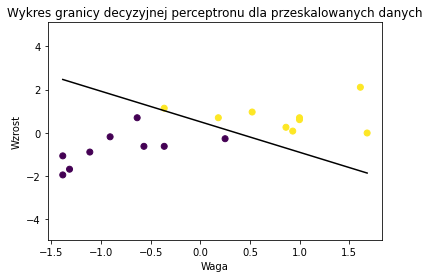

In [4]:
start_timestamp = datetime.now()
p = Perceptron(learning_rate=0.01, n_iters=50)
p.fit(X, gender_m)
calc_time_sc = datetime.now() - start_timestamp

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=gender_m)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
ymin = np.amin(X[:, 1])
ymax = np.amax(X[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
ax.set_title('Wykres granicy decyzyjnej perceptronu dla przeskalowanych danych')
plt.show()

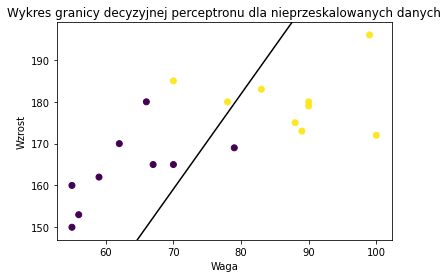

In [5]:
# NOT SCALED DATA
start_timestamp = datetime.now()
p_ns = Perceptron(learning_rate=0.01, n_iters=50)
p_ns.fit(X_, gender_m)
calc_time = datetime.now() - start_timestamp

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_[:, 0], X_[:, 1], marker='o', c=gender_m)

x0_1 = np.amin(X_[:, 0])
x0_2 = np.amax(X_[:, 0])

x1_1 = (-p_ns.weights[0] * x0_1 - p_ns.bias) / p_ns.weights[1]
x1_2 = (-p_ns.weights[0] * x0_2 - p_ns.bias) / p_ns.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
ymin = np.amin(X_[:, 1])
ymax = np.amax(X_[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
ax.set_title('Wykres granicy decyzyjnej perceptronu dla nieprzeskalowanych danych')
plt.show()

In [6]:
print('Calculation time for scaled data: ', calc_time_sc)
print('Calculation time for non scaled data: ', calc_time)

Calculation time for scaled data:  0:00:00.014961
Calculation time for non scaled data:  0:00:00.013962


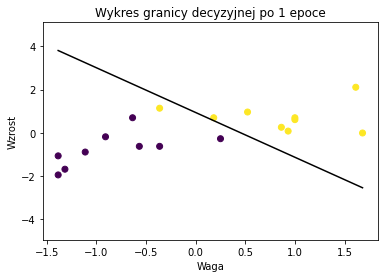

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=gender_m)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-p.epochs_weights[0][0] * x0_1 - p.epochs_weights[0][2]) / p.epochs_weights[0][1]
x1_2 = (-p.epochs_weights[0][0] * x0_2 - p.epochs_weights[0][2]) / p.epochs_weights[0][1]
ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
ax.set_title('Wykres granicy decyzyjnej po 1 epoce')
ymin = np.amin(X[:, 1])
ymax = np.amax(X[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

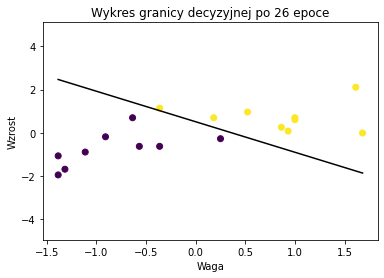

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=gender_m)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-p.epochs_weights[25][0] * x0_1 - p.epochs_weights[25][2]) / p.epochs_weights[25][1]
x1_2 = (-p.epochs_weights[25][0] * x0_2 - p.epochs_weights[25][2]) / p.epochs_weights[25][1]
ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
ax.set_title('Wykres granicy decyzyjnej po 26 epoce')
ymin = np.amin(X[:, 1])
ymax = np.amax(X[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

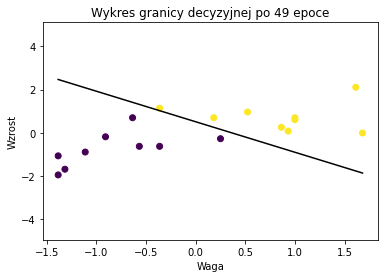

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=gender_m)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-p.epochs_weights[48][0] * x0_1 - p.epochs_weights[48][2]) / p.epochs_weights[48][1]
x1_2 = (-p.epochs_weights[48][0] * x0_2 - p.epochs_weights[48][2]) / p.epochs_weights[48][1]

ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
ax.set_title('Wykres granicy decyzyjnej po 49 epoce')
ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
ymin = np.amin(X[:, 1])
ymax = np.amax(X[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

In [10]:
dataset3D = pd.read_csv('datasets/3D_perceptron.csv', sep=',')

y = np.array(dataset3D['y'].values)
X_3d = np.array(dataset3D[['x1', 'x2', 'x3']].values)

scaler = StandardScaler()
X3d = scaler.fit_transform(X_3d)

In [11]:
p_3d = Perceptron(learning_rate=0.01, n_iters=1000)
p_3d.fit(X3d, y)

In [12]:
print(p_3d.weights)

[0.01099321 0.03258037 0.03499045]


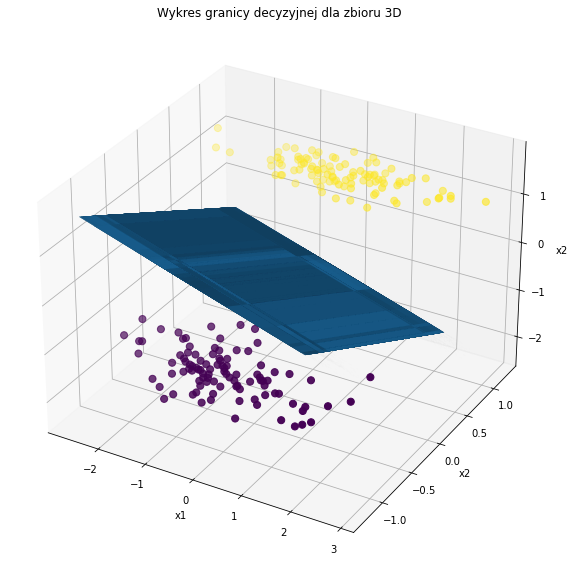

In [13]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

xx1, xx2 = np.meshgrid(X3d[:, 0], X3d[:, 1])
z = (-p_3d.weights[0] * xx1 -p_3d.weights[1] * xx2  - p_3d.bias) / p_3d.weights[2]
ax.plot_surface(xx1, xx2, z, alpha=0.5)

ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], c=y, marker='o', s=50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x2');
ax.set_title('Wykres granicy decyzyjnej dla zbioru 3D')

plt.show()

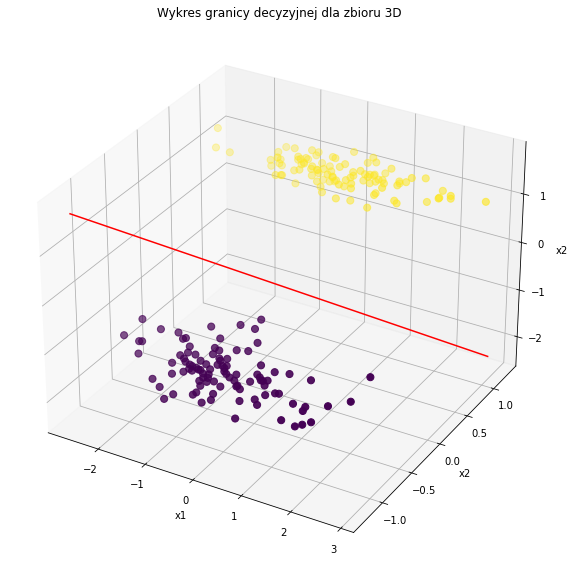

In [14]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

x0_1 = np.amin(X3d[:, 0])
x0_2 = np.amax(X3d[:, 0])

x1_1 = np.amin(X3d[:, 1])
x1_2 = np.amax(X3d[:, 1])

x2_1 = (-p_3d.weights[0] * x0_1 -p_3d.weights[1] * x1_1  - p_3d.bias) / p_3d.weights[2]
x2_2 = (-p_3d.weights[0] * x0_2 -p_3d.weights[1] * x1_2  - p_3d.bias) / p_3d.weights[2]

ax.plot([x0_1, x0_2], [x1_1, x1_2], [x2_1, x2_2] , 'r')

ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], c=y, marker='o', s=50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x2');
ax.set_title('Wykres granicy decyzyjnej dla zbioru 3D')
plt.show()

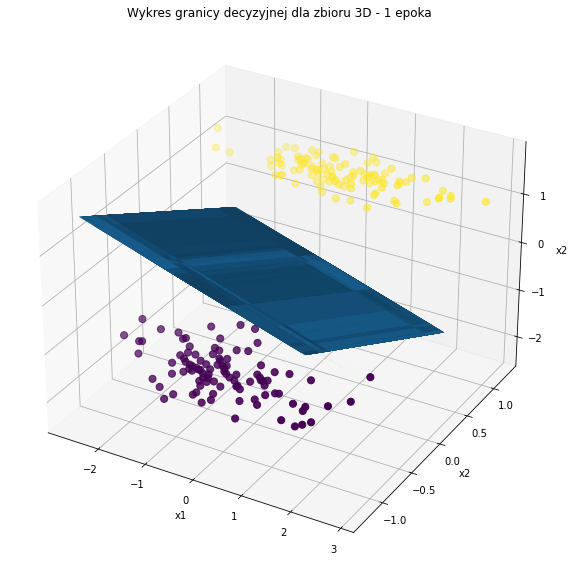

In [15]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

xx1, xx2 = np.meshgrid(X3d[:, 0], X3d[:, 1])
z = (-p_3d.epochs_weights[0][0] * xx1 -p_3d.epochs_weights[0][1] * xx2  - p_3d.epochs_weights[0][3]) / p_3d.epochs_weights[0][2]
ax.plot_surface(xx1, xx2, z, alpha=0.5)

ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], c=y, marker='o', s=50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x2');
ax.set_title('Wykres granicy decyzyjnej dla zbioru 3D - 1 epoka')

plt.show()

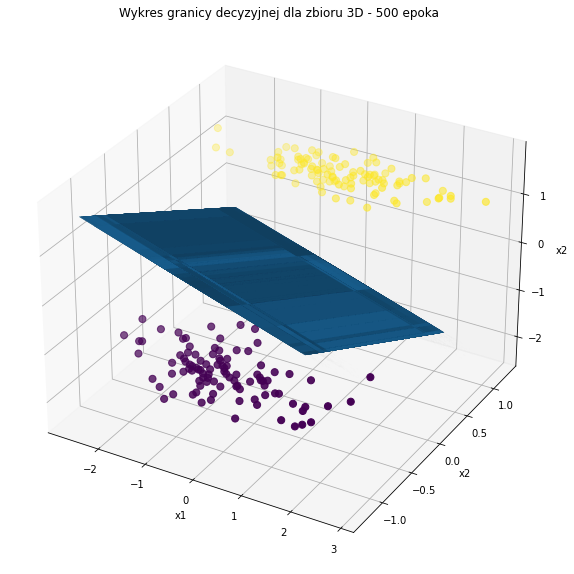

In [16]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

xx1, xx2 = np.meshgrid(X3d[:, 0], X3d[:, 1])
z = (-p_3d.epochs_weights[499][0] * xx1 -p_3d.epochs_weights[499][1] * xx2  - p_3d.epochs_weights[499][3]) / p_3d.epochs_weights[499][2]
ax.plot_surface(xx1, xx2, z, alpha=0.5)

ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], c=y, marker='o', s=50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x2');
ax.set_title('Wykres granicy decyzyjnej dla zbioru 3D - 500 epoka')

plt.show()